# violinplot

При рассмотрении примеров работы библиотеки seaborn, нам также понадобятся библиотеки matplotlib, pandas и numpy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = 'svg'

Данный код позволяет отображать графики в формате SVG (Scalable Vector Graphics), то есть в формате векторной графики. SVG основан на векторах, и это означает, что изображения состоят из линий и форм, а не пикселей. Это позволяет масштабировать изображения без потери качества.

Поговорим о так называемых скрипичных диаграммах. Это название происходит от его внешнего вида, напоминающего контур скрипки, виолончели. Скрипичный график комбинирует в себе элементы диаграммы размаха и ядерной оценки плотности KDE, что позволяет лучше визуализировать распределение данных.

В библиотеке *seaborn* для построения скрипичной диаграммы используется функция `sns.violinplot()`. Основные параметры этой функции следующие:
- `data`: DataFrame или массив, содержащий данные для построения графика;
- `x`: название переменной или вектор данных для оси X;
- `y`: название переменной или вектор данных для оси Y;
- `orient`: указывает, какая ось используется для категорий, а какая для числовых данных ('v', 'h');
- `hue`: название переменной или вектор данных, определяющий расцветку разных категорий;
- `order`: упорядоченный список уникальных значений для той оси, на которой отображаются категориальные данные;
- `hue_order`: упорядоченный список уникальных значений для переменной hue;
- `inner`: определяет что показывать внутри скрипичной диаграммы (варианты: 'box', 'quart' или 'quartiles', 'point', 'stick', None). По умолчанию inner='box';
- `split`: разделение "виолончели" на две части в зависимости от hue. По умолчанию split=False;
- `width`: задает ширину каждой "виолончели". Значение по умолчанию = 0.8;
- `dodge`: логическое значение, определяющее, будут ли "виолончели" разных категорий hue расположены рядом (если True) или наложены друг на друга (если False);
- `linewidth`: задает толщину линии границы "виолончели";
- `linecolor`: задает цвет линии границы "виолончели";
- `cut`: количество точек вне диапазона данных, которые будут включены в оценку плотности. По умолчанию cut=2;
- `gridsize`: количество точек для оценки плотности. По умолчанию gridsize=100;
- `scale`, `density_norm`: определяет, как масштабировать каждую "виолончель" (варианты: 'area' (по умолчанию), 'count', 'width').
 
Рассматривать примеры будем на датасете `'mpg'`. Посмотрим на данные:

In [3]:
df = sns.load_dataset('mpg').dropna()

df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Содержание датафрейма:
- `'mpg'`: расход топлива, измеренный в милях на галлон (miles per gallon);
- `'cylinders'`: количество цилиндров в двигателе;
- `'displacement'`: объем двигателя, измеренный в кубических дюймах;
- `'horsepower'`: мощность двигателя, измеренная в лошадиных силах;
- `'weight'`: вес автомобиля в фунтах;
- `'acceleration'`: время разгона с 0 до 60 миль в час, измеренное в секундах;
- `'model_year'`: год выпуска модели автомобиля;
- `'origin'`: страна происхождения автомобиля (США, Европа, Япония);
- `'name'`: название модели автомобиля.

In [4]:
df = df[df['cylinders'].isin([4, 6, 8])]

Для начала построим простую скрипичную диаграмму по данным о лошадиных силах:

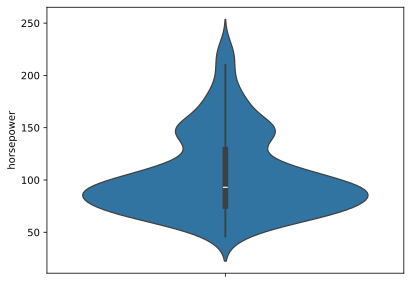

In [5]:
sns.violinplot(df['horsepower']);

При помощи параметра `orient` мы можем изменить отображение графика с вертикального на горизонтальное:

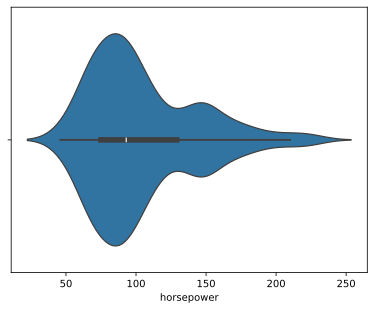

In [6]:
sns.violinplot(df['horsepower'],
               orient='h');

Или просто передать количественную переменную на другую ось:

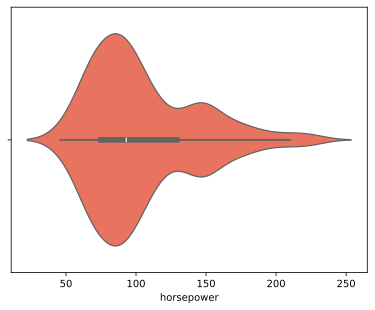

In [7]:
sns.violinplot(data=df, x='horsepower',
               color='tomato');

Теперь немного усложним диаграмму и посмотрим на распределение данных в зависимости от количества цилиндров:

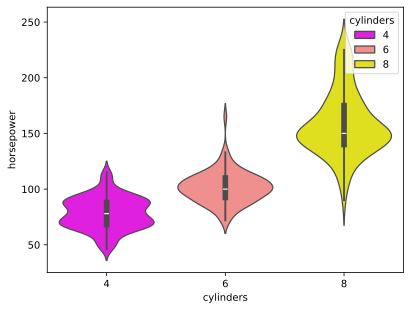

In [8]:
sns.violinplot(x='cylinders', y='horsepower', data=df,
               hue='cylinders',
               palette='spring');

И используя параметр `hue`, разделим марки автомобилей по региону происхождения и количеству цилиндров в двигателе:

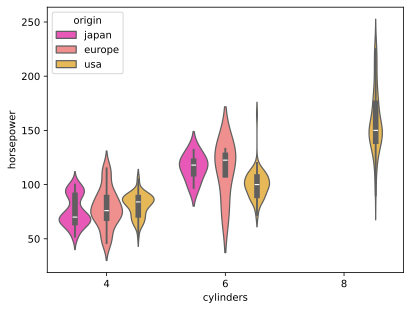

In [9]:
sns.violinplot(x='cylinders', y='horsepower', data=df,
               palette='spring',
               hue='origin');

**Параметр dodge**

Параметр `dodge` определяет, будут ли скрипичные диаграммы разных уровней переменной `hue` отображаться рядом друг с другом или будут накладываться друг на друга.

Для примера наложим друг на друга диаграммы предыдущего графика, передав параметру `dodge` значение `False`:

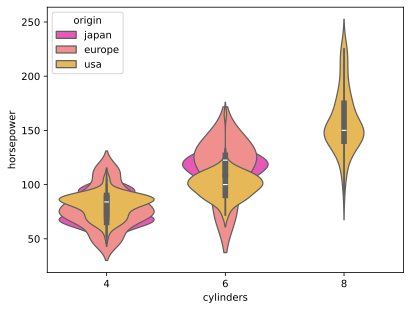

In [10]:
sns.violinplot(x='cylinders', y='horsepower', data=df,
               palette='spring',
               hue='origin', 
               dodge=False);

В данном случае может оказаться полезным отказ от заливки "виолончелей":

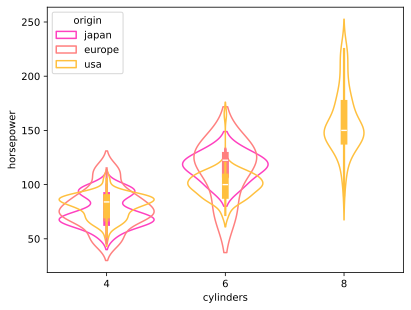

In [11]:
sns.violinplot(x='cylinders', y='horsepower', data=df,
               palette='spring',
               hue='origin', 
               dodge=False,
               fill=False);

**Параметр split**

Параметр `split` используется для того, чтобы показать распределение данных для различных уровней переменной `hue` на одном графике, разделяя их по сторонам скрипичной диаграммы. Это может быть полезно для сравнения распределений между двумя уровнями одной переменной.

Для того, чтобы использовать этот параметр, нужно оставить для сравнения две категории, поэтому уберём из данных информацию по маркам автомобилей из США:

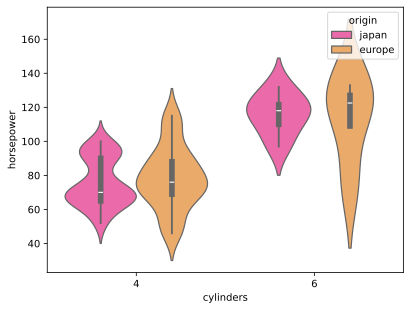

In [12]:
sns.violinplot(x='cylinders', y='horsepower', 
               data=df[df['origin'].isin(['japan', 'europe'])],
               palette='spring',
               hue='origin');

И теперь к этим данным мы можем применить параметр `split=True`:

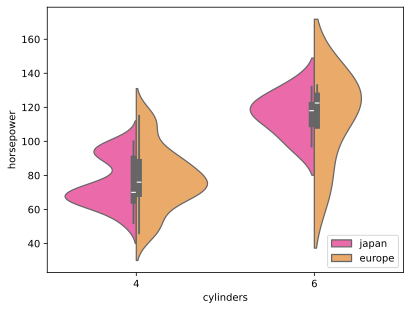

In [13]:
sns.violinplot(x='cylinders', y='horsepower', 
               data=df[df['origin'].isin(['japan', 'europe'])],
               palette='spring',
               hue='origin',
               split=True)
plt.legend(loc=4);

В итоге получаем диаграмму, в которой каждая "виолончель" содержит в себе информацию по двум категориям.

**Параметр inner**

Параметр `inner` функции `sns.violinplot()` определяет, какие элементы будут отображаться внутри "виолончели". Этот параметр позволяет дополнительно визуализировать определенные статистические характеристики данных, что делает график более информативным.

Варианты значений параметра `inner`:
1. `'box'` (по умолчанию): внутри "виолончели" отображается диаграмма размаха.
2. `'quartiles'` или `'quart'`: отображаются линии, соответствующие первому, второму (медиана) и третьему квартилям, что помогает понять, где 25%, 50% и 75% данных:

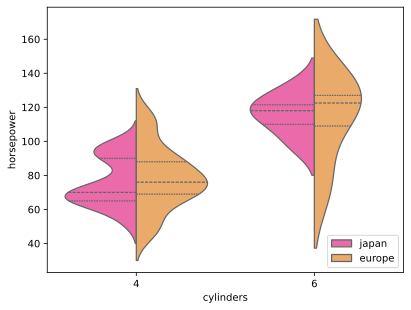

In [14]:
sns.violinplot(x='cylinders', y='horsepower', 
               data=df[df['origin'].isin(['japan', 'europe'])],
               palette='spring',
               hue='origin',
               split=True,
               inner='quart')
plt.legend(loc=4);

3. `'point'`: внутри "виолончели" отображаются точки, представляющие отдельные наблюдения. Этот вариант полезен для визуализации отдельных значений и понимания плотности данных:

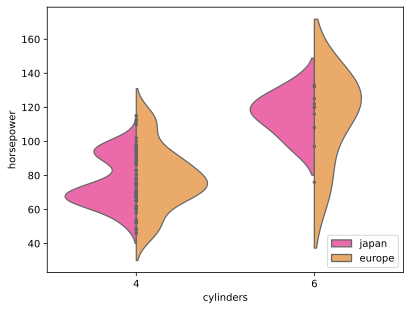

In [16]:
sns.violinplot(x='cylinders', y='horsepower', 
               data=df[df['origin'].isin(['japan', 'europe'])],
               palette='spring',
               hue='origin',
               split=True,
               inner='point')
plt.legend(loc=4);

4. `'stick'`: внутри "виолончели" отображаются вертикальные линии, представляющие отдельные наблюдения. Этот вариант полезен для понимания распределения данных без перекрытия точек:

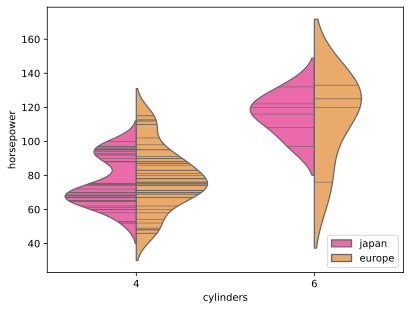

In [17]:
sns.violinplot(x='cylinders', y='horsepower', 
               data=df[df['origin'].isin(['japan', 'europe'])],
               palette='spring',
               hue='origin',
               split=True,
               inner='stick')
plt.legend(loc=4);

У "виолончели", показывающей распределение автомобилей с шестицилиндровыми двигателями, малое количество значений. Давайте проверим так ли это на самом деле:

In [18]:
df[df['origin'].isin(['japan', 'europe'])].groupby('cylinders')['origin'].value_counts()

cylinders  origin
4          japan     69
           europe    61
6          japan      6
           europe     4
Name: count, dtype: int64

Да, данные на диаграмме отобразились верно.


5. При установке `inner=None` внутри "виолончели" не отображается никаких дополнительных элементов:

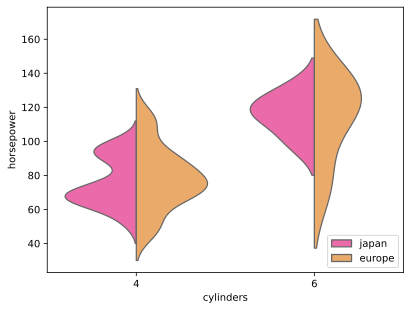

In [19]:
sns.violinplot(x='cylinders', y='horsepower', 
               data=df[df['origin'].isin(['japan', 'europe'])],
               palette='spring',
               hue='origin',
               split=True,
               inner=None)
plt.legend(loc=4);


**Параметр gap**

Параметр `gap` функции `sns.violinplot()` управляет расстоянием между различными "виолончелями" (или подкатегориями) в пределах одной категории. По умолчанию `gap=0`.

Например, немного разъединим "виолончели" в предыдущем графике:

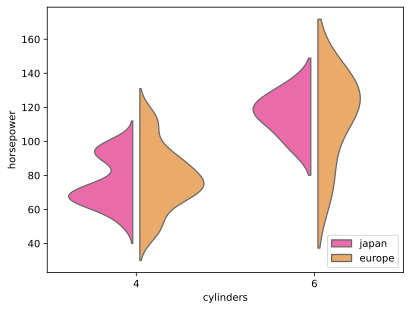

In [20]:
sns.violinplot(x='cylinders', y='horsepower', 
               data=df[df['origin'].isin(['japan', 'europe'])],
               palette='spring',
               hue='origin',
               split=True,
               inner=None,
               gap=0.1)
plt.legend(loc=4);

**Параметр cut**

Параметр `cut` задает число стандартных отклонений, на которые KDE будет расширяться за пределы минимальных и максимальных значений данных. Это помогает создать более плавную и эстетически приятную визуализацию плотности данных.

В зависимости от значений параметра `cut`, график может выглядеть более сглаженным или обрезанным. Значение `cut=0` ограничит "виолончель" строго границами данных, а большие значения создадут более длинные хвосты. По умолчанию параметр `cut` принимает значение 2.

Для примера ограничимся строго границами данных:

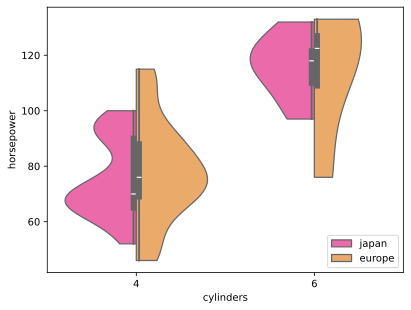

In [21]:
sns.violinplot(x='cylinders', y='horsepower', 
               data=df[df['origin'].isin(['japan', 'europe'])],
               palette='spring',
               hue='origin',
               split=True,
               cut=0)
plt.legend(loc=4);

Настройка этого параметра позволяет пользователю балансировать между эстетикой и точностью отображения данных.

**Параметр density_norm**

Параметр `density_norm` или `scale` (в зависимости от версии библиотеки *seaborn*) функции `sns.violinplot()` управляет нормализацией плотности данных на скрипичной диаграмме. Этот параметр определяет, как плотность данных будет масштабироваться, что влияет на вид и интерпретацию графика. По умолчанию параметр `density_norm` принимает значение `'area'`.

Рассмотрим варианты значений параметра `density_norm`:

1. `'area'`: Плотность нормализуется так, чтобы общая площадь каждого скрипичного графика была одинаковой, независимо от количества данных. То есть высота каждой "виолончели" будет масштабироваться так, чтобы они все занимали одинаковую площадь:

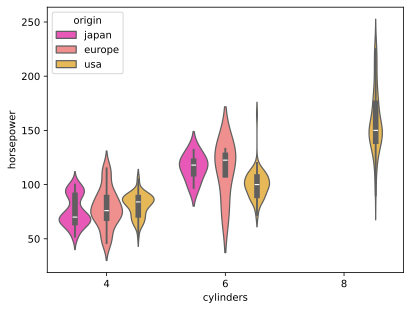

In [22]:
sns.violinplot(x='cylinders', y='horsepower', data=df,
               palette='spring',
               hue='origin');

2. `'count'`: В данном случае плотность нормализуется по количеству наблюдений. Чем больше наблюдений в категории, тем шире будет "виолончель":

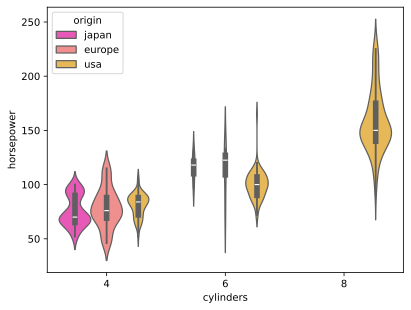

In [23]:
sns.violinplot(x='cylinders', y='horsepower', data=df,
               palette='spring',
               hue='origin',
               density_norm='count');

Этот вариант может быть полезен, когда нужно показать, что в одной категории данных больше, чем в другой.

3. `'width'`: При использовании `'width'`, максимальная ширина каждой "виолончели" будет одинаковой, но площадь может варьироваться в зависимости от плотности данных:

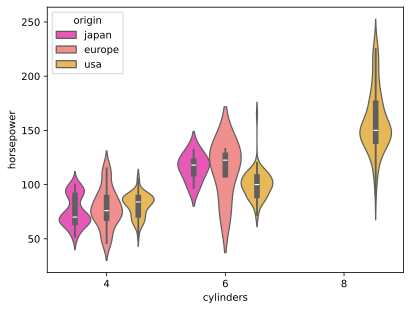

In [24]:
sns.violinplot(x='cylinders', y='horsepower', data=df,
               palette='spring',
               hue='origin',
               density_norm='width');

**Параметр bw_method**

Параметр `bw_method` определяет метод или точное значение для вычисления ширины полосы пропускания, используемой при оценке плотности ядра. Полоса пропускания влияет на степень сглаживания распределения данных: слишком узкая полоса может привести к шумному и детализированному графику, в то время как слишком широкая полоса может сгладить важные особенности распределения.

Параметр `bw_method` может принимать следующие значения:
- `string`: Включает предопределенные методы, такие как `'scott'` (по умолчанию) и `'silverman'`. Эти методы основаны на эмпирических правилах и подходят для большинства случаев.
    1. `'scott'`: Подходит, когда у вас среднее количество данных и вам нужно что-то универсальное.
    2. `'silverman'`: Подходит, когда у вас много данных и вы хотите видеть общую картину без мелких деталей.
- `scala`r: Является числом с плавающей точкой, которое непосредственно определяет ширину полосы пропускания.

Посмотрим на примерах, `bw_method='scott'`:

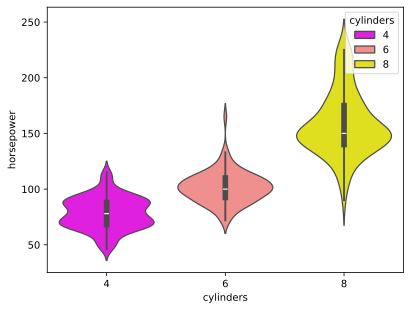

In [25]:
sns.violinplot(x='cylinders', y='horsepower', 
               data=df,
               palette='spring',
               hue='cylinders');

Увеличим степень сглаживания:

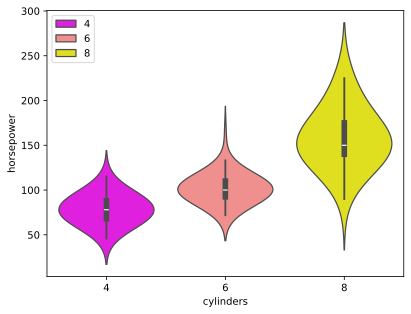

In [26]:
sns.violinplot(x='cylinders', y='horsepower', 
               data=df,
               hue='cylinders',
               palette='spring',
               bw_method=1)
plt.legend(loc=2);

Уменьшим степень сглаживания:

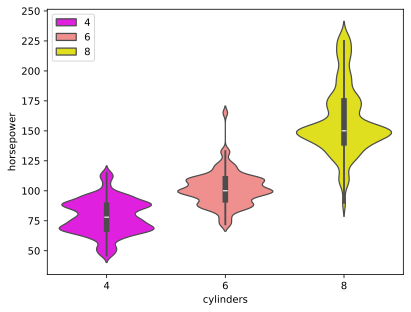

In [27]:
sns.violinplot(x='cylinders', y='horsepower', 
               data=df,
               hue='cylinders',
               palette='spring',
               bw_method=0.2)
plt.legend(loc=2);

**Параметры linewidth и linecolor**

Параметр `linewidth` управляет толщиной линий, которые используются для рисования краев "виолончели" и других элементов на диаграмме.

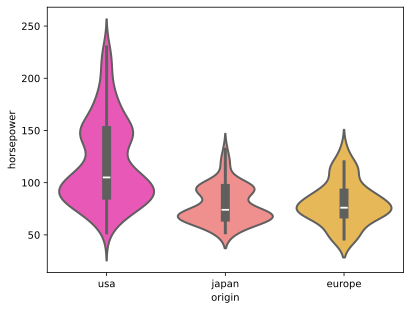

In [28]:
sns.violinplot(x='origin', y='horsepower', data=df,
               hue='origin',
               palette='spring',
               linewidth=2);

Параметр `linecolor` управляет цветом толщиной линий, которые используются для рисования краев "виолончели" и других элементов на диаграмме.

Для примера поменяем цвет границ и диаграммы размаха:

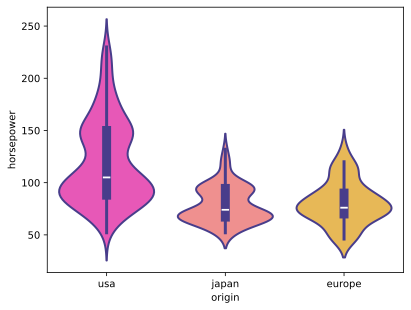

In [29]:
sns.violinplot(x='origin', y='horsepower', data=df,
               hue='origin',
               palette='spring',
               linewidth=2,
               linecolor='DarkSlateBlue');

**Параметр inner_kws**

Параметр `inner_kws` функции `sns.violinplot()` позволяет передавать словарь с атрибутами, которые будут применяться к элементам внутренней графики внутри скрипичных диаграмм.

Для примера на предыдущем графике сделаем пошире внутренние диаграммы размаха и поменяем их цвет на серый:

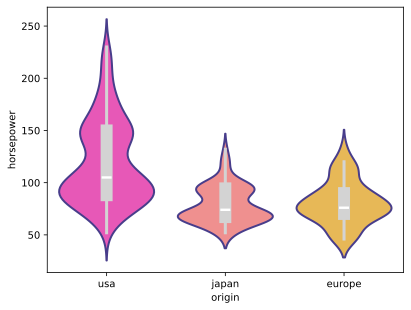

In [30]:
sns.violinplot(x='origin', y='horsepower', data=df,
               hue='origin',
               palette='spring',
               linewidth=2,
               linecolor='DarkSlateBlue',
               inner_kws={'box_width': 12, 'whis_width': 3, 'color': 'lightgrey'});